<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [179]:
#Importation de la librairie Pandas
import pandas as pd

In [180]:
#Importation de la librairie plotly express
import matplotlib.pyplot as plt

In [181]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe

#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium
#table.columns

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [182]:
#Importation du fichier web.xlsx
df_web = pd.read_excel("web.xlsx")
#Importation du fichier erp.xlsx
df_erp = pd.read_excel('erp.xlsx')
#importation du fichier liaison.xlsx
df_liaison = pd.read_excel('liaison.xlsx')

c:\Users\simon\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning:

Unknown extension is not supported and will be removed

c:\Users\simon\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning:

Unknown extension is not supported and will be removed

c:\Users\simon\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning:

Unknown extension is not supported and will be removed



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [183]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [184]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   purchase_price  825 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 38.8+ KB


In [185]:
round(df_erp.describe(),2)

,product_id,onsale_web,price,stock_quantity,purchase_price
count,825.00,825.00,825.00,825.00,825.00
mean,5162.60,0.87,32.19,21.59,16.94
std,902.64,0.34,26.71,21.93,14.56
min,3847.00,0.00,-20.00,-10.00,2.74
25%,4348.00,1.00,14.50,7.00,7.59
50%,4907.00,1.00,24.30,18.00,12.71
75%,5805.00,1.00,42.00,30.00,22.02
max,7338.00,1.00,225.00,145.00,137.81


In [186]:
#Afficher les 5 premières lignes de la table
display(df_erp.iloc[0:5])
display(df_erp.head(5))

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


In [187]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
doublon = df_erp[df_erp.duplicated('product_id')]
doublon
#pas de doublon

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price


In [188]:
#Afficher les valeurs distinctes de la colonne stock_status
#À quelle(s) autre(s) colonne(s) sont-elles liées ?
df_erp['stock_status'].value_counts()
#la colonne 'stock_status' est lié à la colonne 'stock_quantity'

stock_status
instock       733
outofstock     92
Name: count, dtype: int64

In [189]:
#Création d'une colonne "stock_status_2
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"
df_erp["stock_status_2"] = ["instock" if s > 0 else "outofstock" for s in df_erp["stock_quantity"]]
display(df_erp)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
0,3847,1,24.2,16,instock,12.88,instock
1,3849,1,34.3,10,instock,17.54,instock
2,3850,1,20.8,0,outofstock,10.64,outofstock
3,4032,1,14.1,26,instock,6.92,instock
4,4039,1,46.0,3,outofstock,23.77,instock
...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,23.48,instock
821,7204,0,45.0,9,instock,24.18,instock
822,7247,1,54.8,6,instock,27.18,instock
823,7329,0,26.5,14,instock,13.42,instock


In [190]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

0       True
1       True
2       True
3       True
4      False
       ...  
820     True
821     True
822     True
823     True
824     True
Length: 825, dtype: bool

In [191]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset
print((df_erp["stock_status"] == df_erp["stock_status_2"]).sum())
print(len(df_erp))

823
825


In [192]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3
index_false = df_erp.index[df_erp["stock_status"] != df_erp["stock_status_2"]].tolist()
print(index_false)

[4, 398]


In [193]:
index_false_boucle = []
for i in range(len(df_erp)):
    if df_erp["stock_status"][i] != df_erp["stock_status_2"][i]:
        index_false_boucle.append(i)

print(index_false_boucle)

[4, 398]


In [194]:
print(df_erp.iloc[4])
print(df_erp.iloc[398])

product_id              4039
onsale_web                 1
price                   46.0
stock_quantity             3
stock_status      outofstock
purchase_price         23.77
stock_status_2       instock
Name: 4, dtype: object
product_id              4885
onsale_web                 1
price                   18.7
stock_quantity             0
stock_status         instock
purchase_price          9.66
stock_status_2    outofstock
Name: 398, dtype: object


In [195]:
index_false2 = df_erp["stock_status"] != df_erp["stock_status_2"]
df_erp[index_false2]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
4,4039,1,46.0,3,outofstock,23.77,instock
398,4885,1,18.7,0,instock,9.66,outofstock


In [196]:
#Corriger la ou les données incohérentes
df_erp.iloc[4, df_erp.columns.tolist().index("stock_status")] = "instock" #.columns.tolist() transformer la colonne en liste
df_erp.iloc[398, df_erp.columns.tolist().index("stock_status")] = "outofstock"
#Verification en utilisant le même code que plus haut pour afficher les problemes
index_false_corrigé = df_erp.index[df_erp["stock_status"] != df_erp["stock_status_2"]].tolist()
print(index_false_corrigé)
print(df_erp.iloc[4])
print(df_erp.iloc[398])


[]
product_id           4039
onsale_web              1
price                46.0
stock_quantity          3
stock_status      instock
purchase_price      23.77
stock_status_2    instock
Name: 4, dtype: object
product_id              4885
onsale_web                 1
price                   18.7
stock_quantity             0
stock_status      outofstock
purchase_price          9.66
stock_status_2    outofstock
Name: 398, dtype: object


In [197]:
print((df_erp["stock_status"] == df_erp["stock_status_2"]).sum())

825


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [198]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?

#Afficher le ou les prix non renseignés dans la colonne "price"
display('Les produits ayant des prix non renseignés :', df_erp.loc[df_erp['price'].isna()])

#Afficher le prix minimum de la colonne "price"
print("Le min est de ",df_erp['price'].min())

#Afficher le prix maximum de la colonne "price"
print("Le max est de ",df_erp['price'].max())

#Affichier les prix inférieurs à 0 (qu'est ce qu'il faut en faire ?)
display('Les produit ayant un prix inférieur à 0 :', df_erp.loc[df_erp['price'] < 0])


'Les produits ayant des prix non renseignés :'

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2


Le min est de  -20.0
Le max est de  225.0


'Les produit ayant un prix inférieur à 0 :'

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
151,4233,0,-20.0,0,outofstock,10.33,outofstock
469,5017,0,-8.0,0,outofstock,4.34,outofstock
739,6594,0,-9.1,19,instock,4.61,instock


In [199]:
#### Il semblerait nécessaire de s'assurer que les prix affichés ne sont pas une erreur des saisies (un '-' en trop par exemple)
#### La 2e solution serait d'enlever directement ces produits de la base de donnée, avec l'accord de l'utilisateur.

In [200]:
df_erp = df_erp[df_erp['price'] >= 0]

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [201]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
print(df_erp['stock_quantity'].min())

#Afficher la quantité maximum de la colonne "stock_quantity"
print(df_erp['stock_quantity'].max())

#Affichier les stocks inférieurs à 0 (qu'est ce qu'il faut en faire ?)
display('Les produit ayant une quantité inférieure à 0 :', df_erp.loc[df_erp['stock_quantity'] < 0])

-10
145


'Les produit ayant une quantité inférieure à 0 :'

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
449,4973,0,10.0,-10,outofstock,4.96,outofstock
573,5700,1,44.5,-1,outofstock,22.30,outofstock


In [202]:
#### Il semblerait nécessaire de s'assurer que les quantités affichés ne sont pas une erreur des saisies (un '-' en trop par exemple).
#### La 2e solution serait d'enlever directement ces produits de la base de donnée, avec l'accord de l'utilisateur.

In [203]:
df_erp = df_erp[df_erp['stock_quantity'] >= 0]

In [204]:
df_erp.describe()

,product_id,onsale_web,price,stock_quantity,purchase_price
count,820.000000,820.000000,820.000000,820.000000,820.000000
mean,5161.739024,0.871951,32.362744,21.710976,16.987122
std,903.195163,0.334348,26.640110,21.932311,14.584113
min,3847.000000,0.000000,5.200000,0.000000,2.740000
25%,4345.250000,1.000000,14.600000,7.000000,7.642500
50%,4903.500000,1.000000,24.400000,18.000000,12.740000
75%,5805.250000,1.000000,42.000000,30.000000,22.022500
max,7338.000000,1.000000,225.000000,145.000000,137.810000


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [205]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
print(df_erp.columns)
print(df_liaison.columns)
print(df_web.columns)
df_erp['onsale_web'].value_counts()
#### Cette colonne précise si le prroduit est en vente (1) sur le site internent ou non (0).

Index(['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status',
       'purchase_price', 'stock_status_2'],
      dtype='object')
Index(['id_web', 'product_id'], dtype='object')
Index(['sku', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'product_type', 'post_title',
       'post_excerpt', 'post_status', 'comment_status', 'ping_status',
       'post_password', 'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_type', 'post_mime_type', 'comment_count'],
      dtype='object')


onsale_web
1    715
0    105
Name: count, dtype: int64

In [206]:
#Quelles sont les colonnes à conserver selon vous?
#### purchase_date = prix d'achat du produit
#### price = prix de vente du produit
#### Toutes les colonnes peuvent être intéressante pour une future analyse (stock_status_2 est en doublon avec stock_status).

In [207]:
#Supprimer la colonnecomportant le libellé "stock_status_2" car elle est redondante 
#avec la colonne "stock_status".
df_erp = df_erp.drop(columns = ['stock_status_2'])
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,instock,23.77


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [208]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price : 
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"
display("Les produits ayant des prix d'achat non renseignés :", df_erp.loc[df_erp['price'].isna()])
#Afficher le prix minimum de la colonne "purchase_price"
print("Le min est de ",df_erp['purchase_price'].min())
#Afficher le prix maximum de la colonne "purchase_price"
print("Le max est de ",df_erp['purchase_price'].max())

"Les produits ayant des prix d'achat non renseignés :"

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price


Le min est de  2.74
Le max est de  137.81


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

In [209]:
#Dimension du dataset
#Nombre d'observations
print(df_web.shape)
#Nombre de caractéristiques
print(df_web.info())

(1513, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  product_type           1429 non-null   object      

In [210]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  product_type           1429 non-null   object        
 13  pos

In [211]:
#Selon vous, quelles sont les colonnes à conserver ?
#### Toutes les colonnes où il n'y a pas "0 non-null"

In [212]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
df_web = df_web.drop(columns = ['tax_class', 'post_content', 'post_password', 'post_content_filtered'])

In [213]:
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                1428 non-null   object        
 1   virtual            1513 non-null   int64         
 2   downloadable       1513 non-null   int64         
 3   rating_count       1513 non-null   int64         
 4   average_rating     1430 non-null   float64       
 5   total_sales        1430 non-null   float64       
 6   tax_status         716 non-null    object        
 7   post_author        1430 non-null   float64       
 8   post_date          1430 non-null   datetime64[ns]
 9   post_date_gmt      1430 non-null   datetime64[ns]
 10  product_type       1429 non-null   object        
 11  post_title         1430 non-null   object        
 12  post_excerpt       716 non-null    object        
 13  post_status        1430 non-null   object        
 14  comment_

In [214]:
#Visualisation des valeurs de la colonne sku
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
print(df_web['sku'].describe())
print(df_web['sku'].values.tolist())
print(df_web['sku'].value_counts())
print('Le nombre de na est de :', df_web['sku'].isna().sum())

count      1428
unique      714
top       11862
freq          2
Name: sku, dtype: int64
[11862, 16057, 14692, 16295, 15328, 15471, 16515, 16246, nan, 13572, 16513, 16585, 16269, 15526, 12869, 15575, 11586, 14338, 15425, 16560, nan, 15361, 13809, 11587, 15022, 14323, 16342, 16029, 15475, 13754, nan, 14680, 15875, 9636, 13849, 13662, 16564, nan, 13557, 15429, 14712, nan, 15032, 15481, 15448, 16580, 15441, nan, 804, 15300, 13958, 16071, 15678, 13895, 15711, nan, 12869, 12882, 16053, 13766, 16247, 12640, 15292, 15476, 15670, 16189, 16038, 14864, 16044, 15324, 15531, 15953, 15413, 15733, 13809, nan, 14366, 15895, 15892, 16472, 15185, 16010, 15793, 15849, 12315, 15741, 15934, 15148, 15781, 15659, 15106, 15490, 14507, 14149, nan, 16307, 13736, 14090, 16037, 15758, 14661, 12587, 15337, 15489, 15201, 16305, 16131, 13435, 15747, 15758, 12203, 14509, 14768, 16262, 14561, 16505, 15717, 13766, 16129, 13460, 15871, 15940, 11602, 13127, 13520, 15480, 13032, nan, 15436, 15269, nan, 15910, 19821, 16263

In [215]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?
df_web.loc[df_web['sku'].isna()].head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
8,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
41,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [216]:
#Identifier les lignes sans code articles
df_web[df_web['sku'].isna()].index.tolist()

[8,
 20,
 30,
 37,
 41,
 47,
 55,
 75,
 94,
 127,
 130,
 136,
 153,
 162,
 169,
 184,
 198,
 199,
 244,
 264,
 269,
 290,
 319,
 339,
 352,
 359,
 364,
 373,
 376,
 379,
 409,
 421,
 425,
 515,
 522,
 541,
 550,
 557,
 602,
 612,
 622,
 639,
 640,
 666,
 678,
 696,
 703,
 714,
 717,
 726,
 778,
 797,
 819,
 822,
 829,
 836,
 944,
 947,
 968,
 971,
 987,
 1005,
 1018,
 1045,
 1065,
 1084,
 1086,
 1087,
 1098,
 1135,
 1137,
 1151,
 1194,
 1231,
 1244,
 1254,
 1263,
 1301,
 1329,
 1332,
 1384,
 1429,
 1432,
 1445,
 1457]

In [217]:
#Pour les codes articles identifiés, réalisé une analyse et définissez l'action à entreprendre
df_web_liste_sku_null = df_web[df_web['sku'].isna()].index.tolist()
df_web_liste_sku_null
df_web.loc[df_web['sku'].isna()].head()
#### Les produit ayant un sku null ont des données null également sur les autres colonnes. Il semblerait donc que les supprimer serait bénéfique pour la suite des analyses.

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
8,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
41,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [218]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?
df_web.loc[df_web['sku'].isna()].nunique()
#### le .nunique() nous indique les valeurs unique pour chaque colonne. Il ne prends pas en compte les valeurs NaN. Par exemple : en dehors des NaN la colonne total_sales contient 2 valeurs uniques.

sku                  0
virtual              1
downloadable         1
rating_count         1
average_rating       1
total_sales          2
tax_status           1
post_author          1
post_date            2
post_date_gmt        2
product_type         1
post_title           2
post_excerpt         2
post_status          1
comment_status       1
ping_status          1
post_name            2
post_modified        2
post_modified_gmt    2
post_parent          1
guid                 2
menu_order           1
post_type            1
post_mime_type       0
comment_count        1
dtype: int64

In [219]:
#Les lignes sans code article semble être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
df_web_sku_null = df_web.loc[df_web['sku'].isna()]
#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes
df_web_sku_null.info()
#3 - Que constatez-vous?
#### Certaines colonnes où le sku est null il y a des informations comme le montant total de vente ([total_sales]).

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 8 to 1457
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                0 non-null      object        
 1   virtual            85 non-null     int64         
 2   downloadable       85 non-null     int64         
 3   rating_count       85 non-null     int64         
 4   average_rating     2 non-null      float64       
 5   total_sales        2 non-null      float64       
 6   tax_status         2 non-null      object        
 7   post_author        2 non-null      float64       
 8   post_date          2 non-null      datetime64[ns]
 9   post_date_gmt      2 non-null      datetime64[ns]
 10  product_type       2 non-null      object        
 11  post_title         2 non-null      object        
 12  post_excerpt       2 non-null      object        
 13  post_status        2 non-null      object        
 14  comment_status 

In [220]:
df_web.dropna(subset= ['sku'], inplace= True)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [221]:
#Dimension du dataset
#Nombre d'observations

#Nombre de caractéristiques
df_liaison.shape

(825, 2)

In [222]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  825 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [223]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
df_liaison['product_id'].nunique()
#### Les valeurs de la colonne "product_id" sont toutes uniques car il y a autant de valeurs uniques que de ligne.

825

In [224]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
df_liaison['id_web'].nunique()
#### Les valeurs de la colonne "id_web" ne sont pas toutes uniques car il y a moins de valeurs uniques que de ligne.

734

In [225]:
#Avons-nous des articles sans correspondances?
#### Il semblerait qu'il y ait (825 - 723 = 102) 102 articles qui ne corresponde à aucun site.

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [226]:
#Fusion des fichiers df_erp et df_liaison
print(df_erp.columns)
print(df_liaison.columns)

#### la colonne product_id est la colonne commune aux 2 tables. Cette colonne n'a pas de doublon (cf analyse exploratoire df_erp).

df_merge = df_erp.merge(df_liaison, left_on = 'product_id', right_on = 'product_id', indicator= True, how='left') ### indicator = permet de créer une colonne qui précsie si la fusion est commune au é tables ou uniquement celle de droite ou uniquement celle de gauche
df_merge = df_merge.drop_duplicates(subset='product_id')
df_merge.head()

Index(['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status',
       'purchase_price'],
      dtype='object')
Index(['id_web', 'product_id'], dtype='object')


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge
0,3847,1,24.2,16,instock,12.88,15298,both
1,3849,1,34.3,10,instock,17.54,15296,both
2,3850,1,20.8,0,outofstock,10.64,15300,both
3,4032,1,14.1,26,instock,6.92,19814,both
4,4039,1,46.0,3,instock,23.77,19815,both


In [227]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
df_merge[df_merge['id_web'].isnull()].head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge
19,4055,0,86.1,0,outofstock,37.88,NaN,both
49,4090,0,73.0,0,outofstock,33.79,NaN,both
50,4092,0,47.0,0,outofstock,25.25,NaN,both
119,4195,0,14.1,0,outofstock,7.36,NaN,both
131,4209,0,73.5,0,outofstock,33.01,NaN,both


In [228]:
df_merge.dropna(subset=['id_web'], inplace = True)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [229]:
df_web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,11862,0,0,0,0.0,3.0,NaN,2.0,2018-02-12 13:46:23,2018-02-12 12:46:23,...,closed,gilles-robin-hermitage-2012,2019-01-31 12:12:56,2019-01-31 11:12:56,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,16057,0,0,0,0.0,5.0,NaN,2.0,2018-04-17 15:29:17,2018-04-17 13:29:17,...,closed,pelle-sancerre-rouge-la-croix-au-garde-2017,2020-07-07 10:05:02,2020-07-07 08:05:02,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
2,14692,0,0,0,0.0,5.0,taxable,2.0,2019-03-19 10:06:47,2019-03-19 09:06:47,...,closed,fonreaud-bordeaux-blanc-le-cygne-2016,2020-04-25 21:40:31,2020-04-25 19:40:31,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16295,0,0,0,0.0,14.0,NaN,2.0,2018-02-15 14:05:06,2018-02-15 13:05:06,...,closed,moulin-de-gassac-igp-pays-dherault-guilhem-ros...,2020-08-27 18:55:03,2020-08-27 16:55:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
4,15328,0,0,0,0.0,2.0,taxable,2.0,2019-03-27 18:05:09,2019-03-27 17:05:09,...,closed,agnes-levet-cote-rotie-maestria-2017,2020-07-25 15:45:02,2020-07-25 13:45:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [230]:
#Fusionnez les datasets df_merge et df_web
df_merge['product_id'] = df_merge['product_id'].astype(str)
print(df_merge.info())
print(df_web.info())

<class 'pandas.core.frame.DataFrame'>
Index: 733 entries, 0 to 819
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   product_id      733 non-null    object  
 1   onsale_web      733 non-null    int64   
 2   price           733 non-null    float64 
 3   stock_quantity  733 non-null    int64   
 4   stock_status    733 non-null    object  
 5   purchase_price  733 non-null    float64 
 6   id_web          733 non-null    object  
 7   _merge          733 non-null    category
dtypes: category(1), float64(2), int64(2), object(3)
memory usage: 46.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1428 entries, 0 to 1512
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                1428 non-null   object        
 1   virtual            1428 non-null   int64         
 2   downloadable       1428 non-null 

In [231]:
df_merge2 = df_merge.merge(df_web, left_on='id_web', right_on='sku', indicator = '_merge2', how='outer')
##df_merge2 = df_merge2.drop_duplicates(subset='product_id')
display(df_merge2['_merge2'].value_counts())
df_merge2.head()

_merge2
both          1426
left_only       20
right_only       2
Name: count, dtype: int64

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge,sku,virtual,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge2
0,3847,1.0,24.2,16.0,instock,12.88,15298,both,15298,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3847,1.0,24.2,16.0,instock,12.88,15298,both,15298,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both
2,3849,1.0,34.3,10.0,instock,17.54,15296,both,15296,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,3849,1.0,34.3,10.0,instock,17.54,15296,both,15296,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both
4,3850,1.0,20.8,0.0,outofstock,10.64,15300,both,15300,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both


In [232]:
df_merge2 = df_merge.merge(df_web, left_on='id_web', right_on='sku', indicator = '_merge2', how='inner')

display(df_merge2['_merge2'].value_counts())

_merge2
both          1426
left_only        0
right_only       0
Name: count, dtype: int64

In [233]:
df_merge2.describe()

,onsale_web,price,stock_quantity,purchase_price,virtual,downloadable,rating_count,average_rating,total_sales,post_author,post_date,post_date_gmt,post_modified,post_modified_gmt,post_parent,menu_order,comment_count
count,1426.000000,1426.000000,1426.000000,1426.000000,1426.0,1426.0,1426.0,1426.0,1426.000000,1426.000000,1426,1426,1426,1426,1426.0,1426.0,1426.0
mean,0.998597,32.316620,23.478261,16.896438,0.0,0.0,0.0,0.0,8.286115,1.998597,2018-08-21 22:30:01.656381440,2018-08-21 21:01:14.868162560,2020-06-20 23:47:31.953716736,2020-06-20 21:54:00.733520384,0.0,0.0,0.0
min,0.000000,5.200000,0.000000,2.740000,0.0,0.0,0.0,0.0,0.000000,1.000000,2018-02-08 12:58:52,2018-02-08 11:58:52,2018-02-20 15:19:23,2018-02-20 14:19:23,0.0,0.0,0.0
25%,1.000000,14.050000,9.000000,7.240000,0.0,0.0,0.0,0.0,5.000000,2.000000,2018-02-27 14:18:27,2018-02-27 13:18:27,2020-06-19 17:55:02,2020-06-19 15:55:02,0.0,0.0,0.0
50%,1.000000,23.400000,20.000000,12.280000,0.0,0.0,0.0,0.0,8.000000,2.000000,2018-04-19 14:48:15,2018-04-19 12:48:15,2020-08-04 09:30:07,2020-08-04 07:30:07,0.0,0.0,0.0
75%,1.000000,42.000000,30.000000,22.030000,0.0,0.0,0.0,0.0,11.000000,2.000000,2019-01-31 14:39:08,2019-01-31 13:39:08,2020-08-25 10:35:02,2020-08-25 08:35:02,0.0,0.0,0.0
max,1.000000,225.000000,145.000000,137.810000,0.0,0.0,0.0,0.0,122.000000,2.000000,2020-07-20 11:00:00,2020-07-20 09:00:00,2020-08-27 18:55:03,2020-08-27 16:55:03,0.0,0.0,0.0
std,0.037437,27.602245,22.209652,14.831206,0.0,0.0,0.0,0.0,6.478102,0.037437,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [234]:
df_merge2 = df_merge2.drop_duplicates()
df_merge2[df_merge2['price'] < 0]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge,sku,virtual,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge2


In [235]:
# Supprimer les articles ayant un prix inférieur à 0
df_merge2 = df_merge2[df_merge2['price'] >= 0]

In [236]:
#Avons-nous des lignes sans correspondances?
display(df_merge2[df_merge2['product_id'].isna()])
display(df_merge2['_merge2'].value_counts())

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge,sku,virtual,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge2


_merge2
both          1426
left_only        0
right_only       0
Name: count, dtype: int64

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

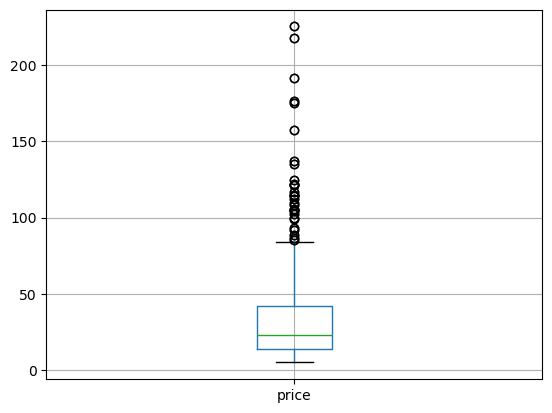

In [237]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
df_merge2.boxplot(column='price')
plt.show()

In [238]:
#Autre méthode avec plotly express
import plotly.express as px

In [239]:
fig = px.box(df_merge2, y = 'price')
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [240]:
#Calculer la moyenne du prix
price_mean = df_merge2['price'].mean()
print(round(price_mean, 2))
#Calculer l'écart-type du prix
price_std = df_merge2['price'].std()
print(round(price_std, 2))
#Calculer le Z-score
price_zscore = (df_merge2['price'] - price_mean) / price_std
print(round(price_zscore, 2))

32.32
27.6
0      -0.29
1      -0.29
2       0.07
3       0.07
4      -0.42
        ... 
1421    1.33
1422    0.81
1423    0.81
1424   -0.58
1425   -0.58
Name: price, Length: 1426, dtype: float64


In [241]:
#Quel est le seuil prix dont z-score est supérieur à 3?
price_zscore[price_zscore > 3].sort_values(ascending= True)

1295    3.046251
1294    3.046251
1313    3.212905
1307    3.212905
1306    3.212905
1312    3.212905
1205    3.249133
1204    3.249133
1022    3.350575
1023    3.350575
1283    3.720110
1282    3.720110
762     3.792568
763     3.792568
442     4.517146
443     4.517146
1104    5.169267
1105    5.169267
437     5.205496
436     5.205496
1172    5.759799
1173    5.759799
853     6.708997
852     6.708997
399     6.980714
398     6.980714
Name: price, dtype: float64

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [242]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
df_merge2['price'].describe()

count    1426.000000
mean       32.316620
std        27.602245
min         5.200000
25%        14.050000
50%        23.400000
75%        42.000000
max       225.000000
Name: price, dtype: float64

In [243]:
#Définissez un seuil pour les articles "outliers" en prix
#### Selon le box plot de plotly express calculé plus haut : les outliers serait toutes les valeurs ayant un prix supérieur à 83,7.

In [244]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"
df_merge2[df_merge2['price'] > 83.7].sort_values(by = ['price'], ascending= True).tail()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge,sku,virtual,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge2
1172,5892,1,191.3,98,instock,116.06,14983,both,14983,0,...,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,2020-04-01 09:30:09,2020-04-01 07:30:09,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both
853,5001,1,217.5,18,instock,116.87,14581,both,14581,0,...,david-duband-charmes-chambertin-grand-cru-2014,2020-05-16 09:00:05,2020-05-16 07:00:05,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
852,5001,1,217.5,18,instock,116.87,14581,both,14581,0,...,david-duband-charmes-chambertin-grand-cru-2014,2020-05-16 09:00:05,2020-05-16 07:00:05,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both
398,4352,1,225.0,0,outofstock,137.81,15940,both,15940,0,...,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both
399,4352,1,225.0,0,outofstock,137.81,15940,both,15940,0,...,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


In [245]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?
#### Soit par la méthode qu'on vient d'utiliser lecture du graphique boxplot ou alors par la méthode de l'intervalle interquartile : Q3 - Q1
#### Q1 = médiane des prix inférieur à la médiane 
#### Q2 = médiane des prix
#### Q3 = médiane des prix supérieur à la médiane 
median_prix_q2 = df_merge2['price'].median()
print("La médiane de df_erp['price'] est de",median_prix_q2)
ligne_q1 = df_merge2[df_merge2['price'] < median_prix_q2]
display(ligne_q1.head())
mediane_q1 = ligne_q1['price'].median()
print('La médiane de Q1 est de', mediane_q1)
ligne_q3 = df_merge2[df_merge2['price'] > median_prix_q2]
display(ligne_q3.head())
mediane_q3 = ligne_q3['price'].median()
print('La médiane de Q3 est de', mediane_q3)
iqr_price = mediane_q3 - mediane_q1
print("L'IQR est de :", round(iqr_price,2))


La médiane de df_erp['price'] est de 23.4


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge,sku,virtual,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge2
4,3850,1,20.8,0,outofstock,10.64,15300,both,15300,0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both
5,3850,1,20.8,0,outofstock,10.64,15300,both,15300,0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
6,4032,1,14.1,26,instock,6.92,19814,both,19814,0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both
7,4032,1,14.1,26,instock,6.92,19814,both,19814,0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
22,4047,1,18.3,0,outofstock,9.93,14977,both,14977,0,...,pierre-gaillard-gendrines-2018,2020-08-27 09:30:07,2020-08-27 07:30:07,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both


La médiane de Q1 est de 13.95


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge,sku,virtual,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge2
0,3847,1,24.2,16,instock,12.88,15298,both,15298,0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3847,1,24.2,16,instock,12.88,15298,both,15298,0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both
2,3849,1,34.3,10,instock,17.54,15296,both,15296,0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,3849,1,34.3,10,instock,17.54,15296,both,15296,0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both
8,4039,1,46.0,3,instock,23.77,19815,both,19815,0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both


La médiane de Q3 est de 42.05
L'IQR est de : 28.1


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [246]:
##############################
# Calculer le CA su site web #
##############################

#Créez une colonne calculant le CA par article
df_merge2['ca_par_article'] = df_merge2['price'] * df_merge2['total_sales']
display(df_merge2.head())
#Calculez la somme de la colonne "ca_par_article"
#Ce résultat correspond au chiffre d'affaire du site web
ca_site_web = round(df_merge2['ca_par_article'].sum(), 2)
print('La CA du site web est de', ca_site_web)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge,sku,virtual,...,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge2,ca_par_article
0,3847,1,24.2,16,instock,12.88,15298,both,15298,0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,145.2
1,3847,1,24.2,16,instock,12.88,15298,both,15298,0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,145.2
2,3849,1,34.3,10,instock,17.54,15296,both,15296,0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,308.7
3,3849,1,34.3,10,instock,17.54,15296,both,15296,0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,308.7
4,3850,1,20.8,0,outofstock,10.64,15300,both,15300,0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,0.0


La CA du site web est de 296716.2


In [247]:
###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
df_merge2.sort_values(by='ca_par_article', ascending=False, inplace=True)
display(df_merge2.head())
#Réinitialiser l'index du dataset par un reset_index
df_merge2.reset_index(inplace=True)
display(df_merge2.head())
#Afficher les 20 premier articles en CA
display(df_merge2.head(20))
#Graphique en barre des 20 premiers articles avec plotly express


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge,sku,virtual,...,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge2,ca_par_article
152,4150,1,59.0,123,instock,35.45,1366,both,1366,0,...,2020-08-26 18:05:02,2020-08-26 16:05:02,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,6844.0
399,4352,1,225.0,0,outofstock,137.81,15940,both,15940,0,...,2020-03-07 11:18:45,2020-03-07 10:18:45,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,2475.0
398,4352,1,225.0,0,outofstock,137.81,15940,both,15940,0,...,2020-03-07 11:18:45,2020-03-07 10:18:45,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,2475.0
642,4726,1,12.7,0,outofstock,6.82,14950,both,14950,0,...,2020-05-06 11:35:01,2020-05-06 09:35:01,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,1549.4
890,5067,1,59.9,3,instock,30.95,15346,both,15346,0,...,2020-02-13 17:00:01,2020-02-13 16:00:01,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,1317.8


,index,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge,sku,...,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge2,ca_par_article
0,152,4150,1,59.0,123,instock,35.45,1366,both,1366,...,2020-08-26 18:05:02,2020-08-26 16:05:02,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,6844.0
1,399,4352,1,225.0,0,outofstock,137.81,15940,both,15940,...,2020-03-07 11:18:45,2020-03-07 10:18:45,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,2475.0
2,398,4352,1,225.0,0,outofstock,137.81,15940,both,15940,...,2020-03-07 11:18:45,2020-03-07 10:18:45,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,2475.0
3,642,4726,1,12.7,0,outofstock,6.82,14950,both,14950,...,2020-05-06 11:35:01,2020-05-06 09:35:01,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,1549.4
4,890,5067,1,59.9,3,instock,30.95,15346,both,15346,...,2020-02-13 17:00:01,2020-02-13 16:00:01,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,1317.8


,index,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge,sku,...,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge2,ca_par_article
0,152,4150,1,59.0,123,instock,35.45,1366,both,1366,...,2020-08-26 18:05:02,2020-08-26 16:05:02,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,6844.0
1,399,4352,1,225.0,0,outofstock,137.81,15940,both,15940,...,2020-03-07 11:18:45,2020-03-07 10:18:45,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,2475.0
2,398,4352,1,225.0,0,outofstock,137.81,15940,both,15940,...,2020-03-07 11:18:45,2020-03-07 10:18:45,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,2475.0
3,642,4726,1,12.7,0,outofstock,6.82,14950,both,14950,...,2020-05-06 11:35:01,2020-05-06 09:35:01,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,1549.4
4,890,5067,1,59.9,3,instock,30.95,15346,both,15346,...,2020-02-13 17:00:01,2020-02-13 16:00:01,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,1317.8
5,900,5379,1,11.1,33,instock,5.68,14561,both,14561,...,2020-07-11 14:00:03,2020-07-11 12:00:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,1232.1
6,1173,5892,1,191.3,98,instock,116.06,14983,both,14983,...,2020-04-01 09:30:09,2020-04-01 07:30:09,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,1147.8
7,1172,5892,1,191.3,98,instock,116.06,14983,both,14983,...,2020-04-01 09:30:09,2020-04-01 07:30:09,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,1147.8
8,401,4353,1,79.5,127,instock,45.91,12587,both,12587,...,2020-08-22 11:45:02,2020-08-22 09:45:02,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,1113.0
9,400,4353,1,79.5,127,instock,45.91,12587,both,12587,...,2020-08-22 11:45:02,2020-08-22 09:45:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,1113.0


In [248]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
df_merge2['part_du_ca'] = round(( df_merge2['ca_par_article'] / ca_site_web ) * 100,2)
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge2['somme_cumulative_ca'] = round(df_merge2['part_du_ca'].cumsum(),2)
display(df_merge2.head())
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
nb_article_80 = (df_merge2['somme_cumulative_ca'] <= 80).sum()
print("Le nombre d'article représentant 80% du CA est de", nb_article_80)
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
proportion = round(nb_article_80 / len(df_merge2) * 100, 2)
print("La proportion d'article représentant 80% du CA est de", proportion)

,index,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge,sku,...,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge2,ca_par_article,part_du_ca,somme_cumulative_ca
0,152,4150,1,59.0,123,instock,35.45,1366,both,1366,...,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,6844.0,2.31,2.31
1,399,4352,1,225.0,0,outofstock,137.81,15940,both,15940,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,2475.0,0.83,3.14
2,398,4352,1,225.0,0,outofstock,137.81,15940,both,15940,...,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,2475.0,0.83,3.97
3,642,4726,1,12.7,0,outofstock,6.82,14950,both,14950,...,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,1549.4,0.52,4.49
4,890,5067,1,59.9,3,instock,30.95,15346,both,15346,...,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,1317.8,0.44,4.93


Le nombre d'article représentant 80% du CA est de 853
La proportion d'article représentant 80% du CA est de 59.82


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [249]:
#####################################
# Palmares des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
df_merge2.sort_values(by='total_sales', ascending=False, inplace=True)
#Réinitialiser l'index du dataset par un reset_index
df_merge2.reset_index(drop=True,inplace=True)
display(df_merge2.head())
#Afficher les 20 premier articles en quantité
quantité_vendues_par_article = pd.DataFrame(df_merge2.groupby('product_id')['total_sales'].sum().sort_values(ascending=False).head(20))
display(quantité_vendues_par_article)

#Graphique en barre des 20 premiers articles avec plotly express
fig = px.bar(quantité_vendues_par_article, y='total_sales')
fig.show()


,index,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge,sku,...,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge2,ca_par_article,part_du_ca,somme_cumulative_ca
0,642,4726,1,12.7,0,outofstock,6.82,14950,both,14950,...,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,1549.4,0.52,4.49
1,152,4150,1,59.0,123,instock,35.45,1366,both,1366,...,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,6844.0,2.31,2.31
2,900,5379,1,11.1,33,instock,5.68,14561,both,14561,...,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,1232.1,0.42,5.35
3,731,4867,1,9.9,121,instock,4.86,16148,both,16148,...,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,356.4,0.12,25.71
4,730,4867,1,9.9,121,instock,4.86,16148,both,16148,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,356.4,0.12,25.83


,total_sales
product_id,
4726,144.0
5379,122.0
4150,122.0
4867,72.0
4203,54.0
4275,48.0
4647,44.0
6129,40.0
5826,40.0


In [250]:
df_merge2[df_merge2['product_id'] == '4726'][['product_id', 'product_type', 'stock_quantity', 'id_web']]

,product_id,product_type,stock_quantity,id_web
0,4726,Vin,0,14950
9,4726,Vin,0,14950


In [251]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
df_merge2['part_en_quantité'] = (df_merge2['total_sales'] / df_merge2['total_sales'].sum()) * 100

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge2['somme_cumulative_quantité'] = round(df_merge2['part_en_quantité'].cumsum(),2)

#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
nb_article_80_quantité = df_merge2[df_merge2['somme_cumulative_quantité'] <= 80]
print("le nombre d'articles représentant 80% des ventes en quantité est de", len(nb_article_80_quantité))

#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
proportion = len(nb_article_80_quantité) / len(df_merge2) * 100
print("La proportion que représentent ce groupe d'articles dans le catalogue entier du site web est de", round(proportion, 2))



le nombre d'articles représentant 80% des ventes en quantité est de 856
La proportion que représentent ce groupe d'articles dans le catalogue entier du site web est de 60.03


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

In [252]:
######################################
# Calcule le nombre de mois de stock #
######################################

#Import de numpy 
import numpy as np
#Création de la colonne Rotation de stock
df_merge2['rotation_stock'] = round(df_merge2['stock_quantity'] / df_merge2['total_sales'], 2)
#display(df_merge2[['stock_quantity', 'total_sales', 'rotation_stock']])

#Remplacement des "inf" par 0
df_merge2[df_merge2['rotation_stock'] == np.inf][['stock_quantity', 'total_sales', 'rotation_stock']]
### roation stock = "il reste 1 mois pour l'index 1, 3 mois pour l'index 3"
df_merge2.replace(np.inf,0, inplace=True)

#Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge
df_merge_tri_mois_stock = df_merge2.sort_values(by = ['rotation_stock'], ascending=False)

#Graphique en barre du flop 20 des produits qui ont le plus de mois de stock
flop_20_stock = df_merge_tri_mois_stock.head(20)
display(flop_20_stock)
fig = px.bar(flop_20_stock, x='product_id', y='rotation_stock')
fig.show()


,index,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge,sku,...,post_type,post_mime_type,comment_count,_merge2,ca_par_article,part_du_ca,somme_cumulative_ca,part_en_quantité,somme_cumulative_quantité,rotation_stock
1221,140,4142,1,53.0,125,instock,32.15,11641,both,11641,...,attachment,image/jpeg,0.0,both,212.0,0.07,57.43,0.033852,96.73,31.25
1229,141,4142,1,53.0,125,instock,32.15,11641,both,11641,...,product,NaN,0.0,both,212.0,0.07,57.57,0.033852,97.00,31.25
1073,1283,6126,1,135.0,138,instock,80.33,14923,both,14923,...,attachment,image/jpeg,0.0,both,675.0,0.23,9.72,0.042316,91.19,27.60
1062,1282,6126,1,135.0,138,instock,80.33,14923,both,14923,...,product,NaN,0.0,both,675.0,0.23,9.95,0.042316,90.72,27.60
1274,404,4356,1,51.6,81,instock,31.00,12585,both,12585,...,attachment,image/jpeg,0.0,both,154.8,0.05,77.44,0.025389,98.16,27.00
1272,405,4356,1,51.6,81,instock,31.00,12585,both,12585,...,product,NaN,0.0,both,154.8,0.05,77.39,0.025389,98.10,27.00
1132,395,4348,1,59.0,125,instock,34.76,12586,both,12586,...,product,NaN,0.0,both,295.0,0.10,35.67,0.042316,93.69,25.00
1130,394,4348,1,59.0,125,instock,34.76,12586,both,12586,...,attachment,image/jpeg,0.0,both,295.0,0.10,35.57,0.042316,93.60,25.00
1291,149,4148,1,37.5,71,instock,21.88,1364,both,1364,...,attachment,image/jpeg,0.0,both,112.5,0.04,92.94,0.025389,98.59,23.67
1290,148,4148,1,37.5,71,instock,21.88,1364,both,1364,...,product,NaN,0.0,both,112.5,0.04,92.90,0.025389,98.56,23.67


In [269]:
display(round(df_merge2['rotation_stock'].describe(),2))

count    1382.00
mean        2.96
std         3.43
min         0.00
25%         1.75
50%         2.40
75%         3.08
max        31.25
Name: rotation_stock, dtype: float64

In [254]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros
#stock_quantity * price
df_merge2['valorisation_stock'] = df_merge2['stock_quantity'] * df_merge2['price']

#Calculer la somme de la colonne "Valorisation_stock_euros"
print("La somme de la colonne 'valorisation_stock' est de", df_merge2['valorisation_stock'].sum())

La somme de la colonne 'valorisation_stock' est de 989275.8


In [255]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

#Calculer la somme de la colonne stock quantity
print("La somme de la colonne 'stock_quantity' est de", df_merge2['stock_quantity'].sum())

La somme de la colonne 'stock_quantity' est de 33480


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [256]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT
tva = 20
df_merge2['prix_ht'] = round(df_merge2['price'] / (1 + tva / 100), 2)
#Création de la colonne Taux de marge
df_merge2['prix_achat_ht'] = round(df_merge2['purchase_price'] / (1 + tva / 100), 2)
####marge brute = prix de vente HT - coût d'achat HT
df_merge2['marge'] = df_merge2['prix_ht'] - df_merge2['prix_achat_ht']
df_merge2['taux_marge'] = (df_merge2['marge'] / df_merge2['prix_ht']) * 100

#Afficher le prix minimum de la colonne "taux_marge"
print('Le taux de marge minimum est de', df_merge2['taux_marge'].min())
display(df_merge2[df_merge2['taux_marge'] == df_merge2['taux_marge'].min()][['product_type', 'product_id', 'price', 'taux_marge']])


#Afficher le prix maximum de la colonne "taux_marge"
print('Le taux de marge maximum est de', df_merge2['taux_marge'].max())
display(df_merge2[df_merge2['taux_marge'] == df_merge2['taux_marge'].max()][['product_type', 'product_id', 'price', 'taux_marge']])



Le taux de marge minimum est de -512.618595825427


,product_type,product_id,price,taux_marge
1380,Champagne,4355,12.65,-512.618596
1381,Champagne,4355,12.65,-512.618596


Le taux de marge maximum est de 56.46451612903226


,product_type,product_id,price,taux_marge
1362,Whisky,5916,93.0,56.464516
1363,Whisky,5916,93.0,56.464516


In [257]:
#affichage de la ligne avec un taux de marge inférieur à 0
marge_inf_0 = df_merge2['taux_marge'] < 0
df_merge2[marge_inf_0]

,index,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge,sku,...,part_du_ca,somme_cumulative_ca,part_en_quantité,somme_cumulative_quantité,rotation_stock,valorisation_stock,prix_ht,prix_achat_ht,marge,taux_marge
1380,402,4355,1,12.65,97,instock,77.48,12589,both,12589,...,0.0,100.26,0.0,100.0,0.0,1227.05,10.54,64.57,-54.03,-512.618596
1381,403,4355,1,12.65,97,instock,77.48,12589,both,12589,...,0.0,100.26,0.0,100.0,0.0,1227.05,10.54,64.57,-54.03,-512.618596


In [258]:
#création d'un dataframe avec les taux positifs
df_merge2_taux_positif = df_merge2.loc[df_merge2['taux_marge'] >= 0]

#Afficher le prix minimum de la colonne "taux_marge"
print('Le taux de marge minimum est de', round(df_merge2_taux_positif['taux_marge'].min(),2))
display(df_merge2_taux_positif[df_merge2_taux_positif['taux_marge'] == df_merge2_taux_positif['taux_marge'].min()][['product_type', 'product_id', 'price', 'taux_marge']])

#Afficher le prix maximum de la colonne "taux_marge"
print('Le taux de marge maximum est de', round(df_merge2_taux_positif['taux_marge'].max(),2))
display(df_merge2_taux_positif[df_merge2_taux_positif['taux_marge'] == df_merge2_taux_positif['taux_marge'].max()][['product_type', 'product_id', 'price', 'taux_marge']])



Le taux de marge minimum est de 35.71


,product_type,product_id,price,taux_marge
803,Huile d'olive,5760,13.1,35.714286
804,Huile d'olive,5760,13.1,35.714286


Le taux de marge maximum est de 56.46


,product_type,product_id,price,taux_marge
1362,Whisky,5916,93.0,56.464516
1363,Whisky,5916,93.0,56.464516


,taux_marge
product_type,
Autre,46.807489
Champagne,40.406933
Cognac,54.221170
Gin,52.333333
Huile d'olive,37.520405
Vin,48.340490
Whisky,54.101876


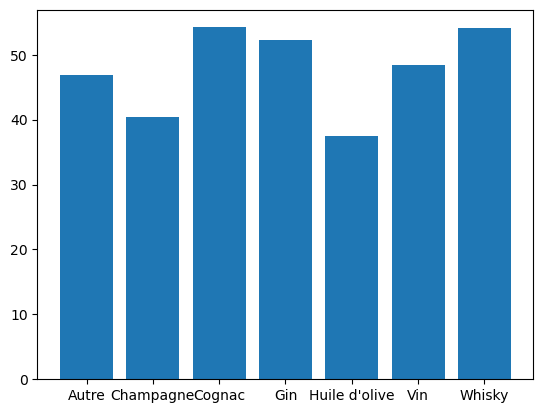

In [259]:
#création d'un dataframe avec le taux de marge moyen par type de produit
df_taux_moyen = pd.DataFrame(df_merge2_taux_positif.groupby("product_type")["taux_marge"].mean())
display(df_taux_moyen)

#Affichage dans un graphique du taux de marge par type de produit
plt.bar(x = df_taux_moyen.index, height = df_taux_moyen['taux_marge'])
plt.show()

px.bar(x=df_taux_moyen.index, y=round(df_taux_moyen['taux_marge'],2))

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des correlations entre les variables stock, sales et price</h3>
</div>

c:\Users\simon\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



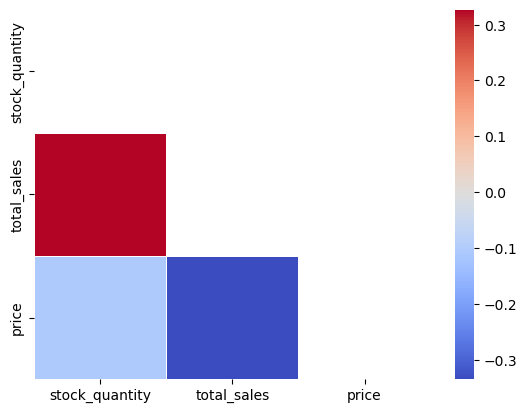

In [260]:
############################
# Analyse des correlations #
############################

#Importation de Seaborn
import seaborn as sns

#Création d'un heatmap de correlation avec les variables stock, sales et price
#on peut également créer un mask pour n'afficher qu'une demi heatmap

df_heatmap = df_merge2.loc[:,['stock_quantity', 'total_sales', 'price']]
mask = np.triu(np.ones(df_heatmap.corr().shape, dtype=bool))

sns.heatmap(df_heatmap.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, mask=mask)
plt.show()

### Les valeurs s'affiches quand on met "mask = None"

c:\Users\simon\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



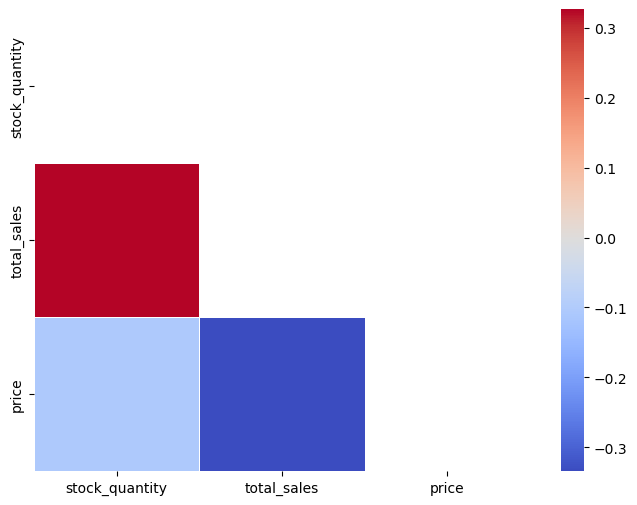

In [261]:
df_heatmap1 = df_merge2.loc[:, ['stock_quantity', 'total_sales', 'price']]
corr_matrix = df_heatmap1.corr()

mask2 = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Création de la figure
plt.figure(figsize=(8, 6))

# Heatmap avec annotations et masque appliqué
sns.heatmap(corr_matrix, mask=mask2, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.show()

In [262]:
#Que peut-on conclure des correlations ?
## Il semble y avoir une faible corrélation positive entre les ventes et la quantité en stock, c'est-à-dire que quand les ventes augmentent le stock augmente également.
## La corrélation est plus faible entre le prix et la quantité en stock.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [263]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.  

df_merge2.to_excel('df_merge2.xlsx', index=False)

# Action pour la suite

### Fonction d'analyse de la table (doublon, valeurs aberrantes, etc)

In [264]:
def analyste_table(table):
    detection = {}

    print("\n Informations générales sur la table :\n")
    print(table.info())

    print("\n Statistiques descriptives pour les colonnes numériques :\n")
    print(table.describe())

    # Valeurs manquantes
    valeurs_manquantes = table.isnull().sum()
    detection['Valeurs manquantes'] = valeurs_manquantes[valeurs_manquantes > 0]
    print("\n Valeurs manquantes :")
    print(detection['Valeurs manquantes'])

    # Doublons
    doublons = table.duplicated().sum()
    detection['Nb de doublons'] = doublons
    print(f"\n Nombre de doublons : {doublons}")

    # Value_counts() pour colonnes de type texte
    colonne_texte = table.select_dtypes(include='object')
    detection["Value_counts"] = {}
    for col in colonne_texte.columns:
        detection["Value_counts"][col] = table[col].value_counts()
        print(f"\nValue_counts pour '{col}' :\n", table[col].value_counts())

    #détection des outliers :
    colonnes_numeriques = table.select_dtypes(include=['number'])
    for col in colonnes_numeriques.columns:
        mediane_q2 = colonnes_numeriques[col].median()
        print(f"\n Analyse de la colonne '{col}':")
        print(f"\n Médiane (Q2) : {mediane_q2}")

        ligne_q1 = colonnes_numeriques[col][colonnes_numeriques[col] < mediane_q2]
        mediane_q1 = ligne_q1.median()
        print(f"\n Médiane de Q1 : {mediane_q1}")

        ligne_q3 = colonnes_numeriques[col][colonnes_numeriques[col] > mediane_q2]
        mediane_q3 = ligne_q3.median()
        print(f"\n Médiane de Q3 : {mediane_q3}")

        iqr_col = mediane_q3 - mediane_q1
        print(f"\n IQR : {round(iqr_col, 2)}")

        # Sélection des lignes où la valeur est supérieure à l'IQR
        valeurs_sup_iqr = table[table[col] > iqr_col]

        print(f"\n Nombre de valeurs supérieures à l'IQR de la colonne {col}: {valeurs_sup_iqr.shape[0]}")
        
        # Sauvegarde des lignes dans le dictionnaire
        detection[col] = valeurs_sup_iqr

    return detection


In [265]:
analyste_table(df_erp)


 Informations générales sur la table :

<class 'pandas.core.frame.DataFrame'>
Index: 820 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      820 non-null    int64  
 1   onsale_web      820 non-null    int64  
 2   price           820 non-null    float64
 3   stock_quantity  820 non-null    int64  
 4   stock_status    820 non-null    object 
 5   purchase_price  820 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 44.8+ KB
None

 Statistiques descriptives pour les colonnes numériques :

        product_id  onsale_web       price  stock_quantity  purchase_price
count   820.000000  820.000000  820.000000      820.000000      820.000000
mean   5161.739024    0.871951   32.362744       21.710976       16.987122
std     903.195163    0.334348   26.640110       21.932311       14.584113
min    3847.000000    0.000000    5.200000        0.000000        2.7400

{'Valeurs manquantes': Series([], dtype: int64),
 'Nb de doublons': 0,
 'Value_counts': {'stock_status': stock_status
  instock       732
  outofstock     88
  Name: count, dtype: int64},
 'product_id':      product_id  onsale_web  price  stock_quantity stock_status  \
 0          3847           1   24.2              16      instock   
 1          3849           1   34.3              10      instock   
 2          3850           1   20.8               0   outofstock   
 3          4032           1   14.1              26      instock   
 4          4039           1   46.0               3      instock   
 ..          ...         ...    ...             ...          ...   
 820        7203           0   45.0              30      instock   
 821        7204           0   45.0               9      instock   
 822        7247           1   54.8               6      instock   
 823        7329           0   26.5              14      instock   
 824        7338           1   16.3              4

In [266]:
# article qui n'est pas vendu sur internet
df_merge2[df_merge2['onsale_web'] == 0][['product_id', 'product_type', 'onsale_web', 'price', 'stock_quantity']]

,product_id,product_type,onsale_web,price,stock_quantity
77,4200,Vin,0,5.8,33
94,4200,Vin,0,5.8,33
